<h1>선형 모델</h1>

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 선형 회귀 모델

당뇨병 데이터 셋

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True,as_frame=True)

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [5]:
# 훈련 데이터와 평가 데이터를 임의로 분할
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [6]:
print( xtrain.shape, xtest.shape )

(265, 10) (177, 10)


단순 회귀 분석

In [7]:
# 변수 중에서 bmi 만 추출
xtrain_simple = xtrain[['bmi']]
xtest_simple = xtest[['bmi']]

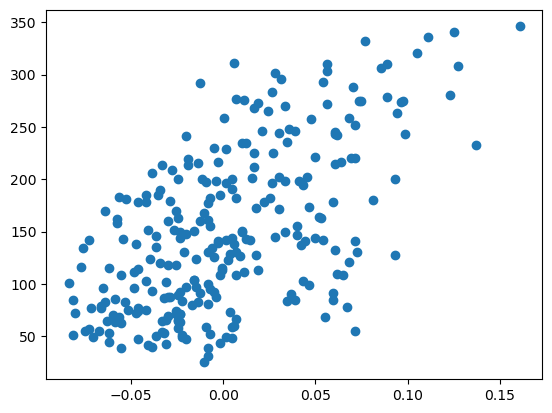

In [8]:
# 훈련데이터에서 x와 y의 관계
plt.scatter(xtrain_simple,ytrain)

In [9]:
# 선형 회귀 모델 선언
from sklearn.linear_model import LinearRegression
f = LinearRegression()

In [10]:
f.fit(xtrain_simple,ytrain)  # 모델 훈련

LinearRegression()

In [11]:
print( f.intercept_, f.coef_ )  # 파라메터 확인

148.53674347978284 [980.74210468]


In [12]:
f.predict([[0.01]])  # 그 값에 대한 예측

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([158.34416453])

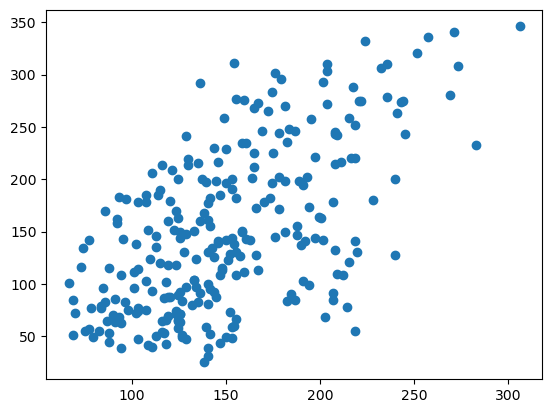

In [13]:
# 모든 훈련데이터에 대해서 예측
ytrain_hat = f.predict(xtrain_simple)
plt.scatter(ytrain_hat,ytrain)  # 예측값과 실제값 사이의 산점도

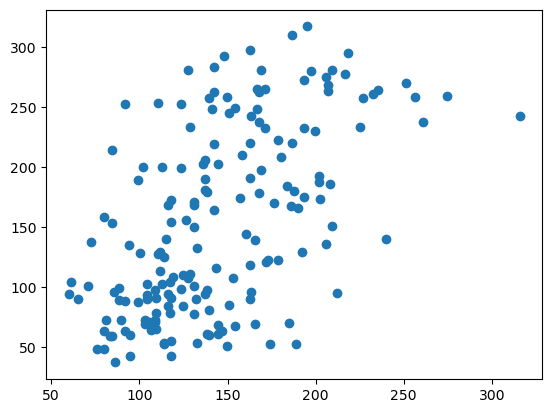

In [14]:
# 모든 평가 데이터에 대해서 예측
ytest_hat = f.predict(xtest_simple)
plt.scatter(ytest_hat,ytest)

In [15]:
f.score(xtrain_simple,ytrain)   # 훈련 데이터에 대한 R2

0.3686078890927439

In [16]:
f.score(xtest_simple,ytest)     # 평가 데이터에 대한 R2

0.2991646176262258

일반 회귀 분석

In [17]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()

In [18]:
f.fit(xtrain,ytrain)

LinearRegression()

In [19]:
print( f.intercept_, f.coef_ )

148.92850899668235 [  18.08383103 -227.04654841  592.2754776   361.54657801 -655.89624143
  353.71022539   14.40233952  142.86622578  594.01401521   31.67348554]


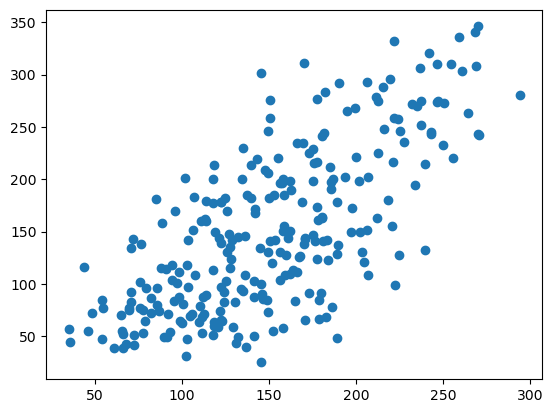

In [20]:
# 모든 훈련데이터에 대해서 예측
ytrain_hat = f.predict(xtrain)
plt.scatter(ytrain_hat,ytrain)  # 예측값과 실제값 사이의 산점도

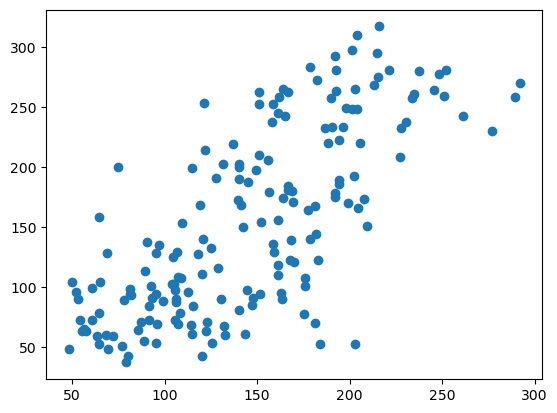

In [21]:
# 모든 평가 데이터에 대해서 예측
ytest_hat = f.predict(xtest)
plt.scatter(ytest_hat,ytest)

In [22]:
# R2 평가
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.5072199968937584 0.51574447568977


# 로지스틱 회귀 모델

아이리스 데이터 셋

In [23]:
import pandas as pd
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True,as_frame=True)
X.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
X = X[50:]
y = y[50:]

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [25]:
xtrain.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
99,5.7,2.8,4.1,1.3
84,5.4,3.0,4.5,1.5
57,4.9,2.4,3.3,1.0
145,6.7,3.0,5.2,2.3
77,6.7,3.0,5.0,1.7


In [26]:
ytrain[:5]

99     1
84     1
57     1
145    2
77     1
Name: target, dtype: int32

In [27]:
print( xtrain.shape, xtest.shape )

(60, 4) (40, 4)


단순 로지스틱 회귀

In [28]:
# 변수 중에서 SepalLength 만 추출
xtrain_simple = xtrain[['SepalLength']]
xtest_simple = xtest[['SepalLength']]

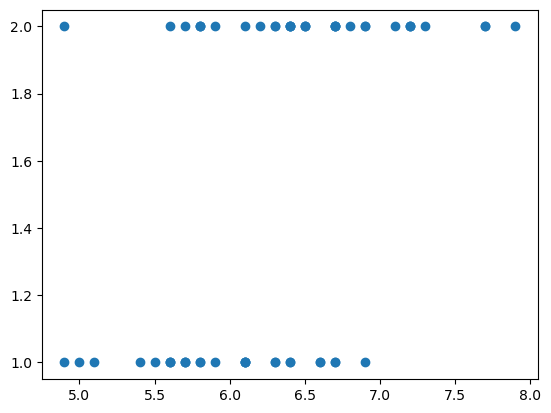

In [29]:
# SepalLength와 target (Species)와의 관계
plt.scatter(xtrain_simple,ytrain)

In [30]:
# 로지스틱 회귀 모델 로딩
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()

In [31]:
# 모델 훈련
f.fit(xtrain_simple,ytrain)

LogisticRegression()

In [32]:
# 파라메터 확인
print( f.intercept_, f.coef_ )

[-8.20141709] [[1.34436502]]


In [33]:
# 하나의 값에 대한 예측
f.predict([[5.5]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [34]:
# 확률 예측
f.predict_proba([[5.5]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.69155721, 0.30844279]])

In [35]:
# 훈련데이터 전체에 대한 예측
ytrain_hat = f.predict(xtrain_simple)

In [36]:
# 혼동 행렬
pd.crosstab(ytrain_hat,ytrain)

target,1,2
row_0,,
1,18,8
2,9,25


In [37]:
# 평가데이터에 대한 예측과 혼동행렬
ytest_hat = f.predict(xtest_simple)
pd.crosstab(ytest_hat,ytest)

target,1,2
row_0,,
1,16,3
2,7,14


In [38]:
# 정확도(Accuracy) 성능 평가
print( f.score(xtrain_simple,ytrain) )
print( f.score(xtest_simple,ytest) )

0.7166666666666667
0.75


일반 로지스틱 회귀 모델

In [39]:
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()
f.fit(xtrain,ytrain)

LogisticRegression()

In [40]:
print( f.intercept_, f.coef_ )

[-12.0380239] [[-0.37085631 -0.45441801  2.54024233  1.96076702]]


In [41]:
ytrain_hat = f.predict(xtrain)
ytest_hat = f.predict(xtest)

In [42]:
pd.crosstab(ytrain_hat,ytrain)

target,1,2
row_0,,
1,25,1
2,2,32


In [43]:
pd.crosstab(ytest_hat,ytest)

target,1,2
row_0,,
1,22,0
2,1,17


In [44]:
# 정확도(Accuracy) 성능 평가
print( f.score(xtrain,ytrain) )
print( f.score(xtest,ytest) )

0.95
0.975


# 연습 문제

1. 아이리스 데이터 셋에서 Sepal Length를 다른 수치형 값인 Sepal WIdth, Petal Length, Petal Width로 선형회귀 예측하고자 한다. 150개의 표본을 모두 사용하여 모델을 훈련한다고 하자. 이때, 훈련 데이터에서 R2의 값은 얼마인가?

In [66]:
import pandas as pd
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True,as_frame=True)
X.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth']

y = X['SepalLength']

In [75]:
X = X[['SepalWidth','PetalLength','PetalWidth']]
X.head()

,SepalWidth,PetalLength,PetalWidth
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [76]:
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: SepalLength, dtype: float64

In [77]:
X.shape, y.shape

((150, 3), (150,))

In [78]:
# 선형 회귀 모델 선언
from sklearn.linear_model import LinearRegression
f = LinearRegression()

In [79]:
f.fit(X, y)

LinearRegression()

In [83]:
round(f.score(X, y), 2)
# 0.86

0.86

2. 당뇨 데이터의 Y 값을 140을 중심으로 Neg와 Pos 로 나누어 이진 분류를 하고자 한다. 아래의 코드를 참조하시오. 로지스틱 회귀 모델을 사용하여 Y를 분류하는 모델을 만드시오. 모델은 모든 X값을 사용하고 훈련 데이터만을 사용하여 훈련한다. 이때, 평가 데이터에 대한 F1값은 얼마인가? Pos를 positive로 생각한다.

In [101]:
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)
y = [ 'Neg' if y_numeric[i]<140 else 'Pos' for i in range(len(y_numeric)) ]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [104]:
X.shape, len(y)

((442, 10), 442)

In [105]:
# 로지스틱 회귀모델 불러오기
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()

In [106]:
# 훈련 데이터만을 사용해서 훈련
f.fit(xtrain, ytrain)

LogisticRegression()

In [107]:
ytrain_hat = f.predict(xtrain)
ytest_hat = f.predict(xtest)


In [108]:
# accuracy

f.score(xtest, ytest)

0.7966101694915254

In [125]:
# f1 score 구하는 법
# 직접 구하기
# (((1/p) + (1/r)/2)^(-1)
pd.crosstab(ytest_hat, ytest)



col_0,Neg,Pos
row_0,,
Neg,68,15
Pos,21,73


In [127]:
r = 73/(73+15)
p = 73/(73+21)
f1 = (((1/r)+(1/p))/2) ** (-1)
f1

# 0.80

0.8021978021978021

In [122]:
# 재현율, 정밀도 한번에 확인하는 코드
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_hat))

# f1_score: 0.80

              precision    recall  f1-score   support

         Neg       0.82      0.76      0.79        89
         Pos       0.78      0.83      0.80        88

    accuracy                           0.80       177
   macro avg       0.80      0.80      0.80       177
weighted avg       0.80      0.80      0.80       177



In [ ]:
# 라이브러리 잉
# f1 score 

from sklearn.metrics import f1_score

f1_score(ytest, y_pred, pos_label='Pos')